# CartPole-v1 eredmények

A CartPole környezet folytonos állapottérrel rendelkezik,
ezért tabuláris módszerekhez diszkretizáció szükséges.

Ebben a notebookban az epizódhossz alapján értékelem a tanulást.


In [11]:
import sys
from pathlib import Path

# Add parent directory to path to import utils
sys.path.insert(0, str(Path.cwd().parent))

import matplotlib.pyplot as plt
from util import aggregate_by_episode, load_logs, moving_average

sarsa = load_logs("CartPole-v1", "SARSA")
qlearning = load_logs("CartPole-v1", "Q-learning")


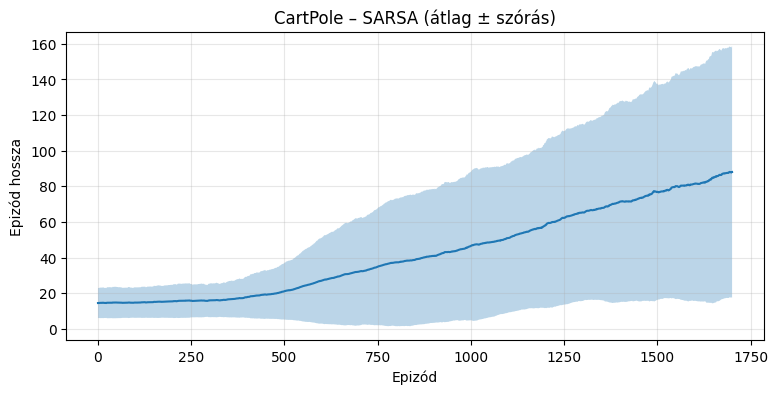

In [12]:
mean, std = aggregate_by_episode(sarsa, "length")

y = moving_average(mean.values, 300)
y_std = moving_average(std.fillna(0).values, 300)
x = mean.index[:len(y)]

plt.figure(figsize=(9, 4))
plt.plot(x, y)
plt.fill_between(x, y - y_std, y + y_std, alpha=0.3)

plt.xlabel("Epizód")
plt.ylabel("Epizód hossza")
plt.title("CartPole – SARSA (átlag ± szórás)")
plt.grid(True, alpha=0.3)
plt.show()


A SARSA tanulása lassabb és kevésbé stabil.
Ez részben a diszkretizáció pontatlanságából adódik.


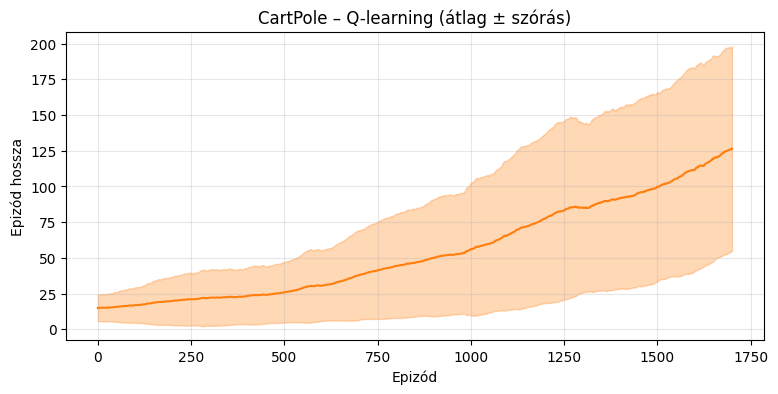

In [13]:
mean, std = aggregate_by_episode(qlearning, "length")

y = moving_average(mean.values, 300)
y_std = moving_average(std.fillna(0).values, 300)
x = mean.index[:len(y)]

plt.figure(figsize=(9, 4))
plt.plot(x, y, color="tab:orange")
plt.fill_between(x, y - y_std, y + y_std, alpha=0.3, color="tab:orange")

plt.xlabel("Epizód")
plt.ylabel("Epizód hossza")
plt.title("CartPole – Q-learning (átlag ± szórás)")
plt.grid(True, alpha=0.3)
plt.show()


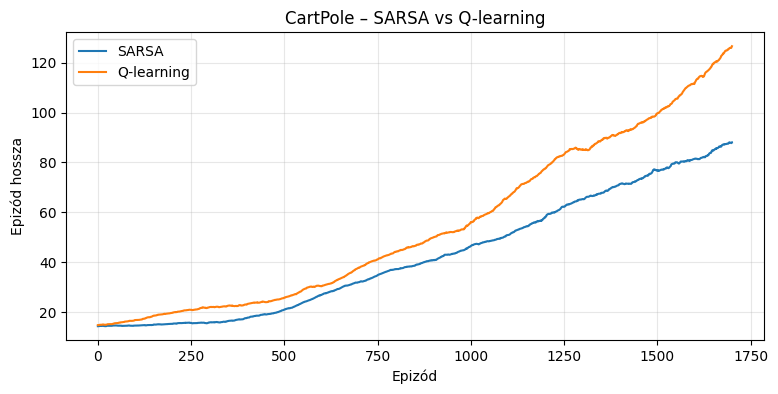

In [14]:
plt.figure(figsize=(9, 4))

plt.plot(
    moving_average(aggregate_by_episode(sarsa, "length")[0].values, 300),
    label="SARSA"
)
plt.plot(
    moving_average(aggregate_by_episode(qlearning, "length")[0].values, 300),
    label="Q-learning"
)

plt.xlabel("Epizód")
plt.ylabel("Epizód hossza")
plt.title("CartPole – SARSA vs Q-learning")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


## Rövid elemzés

- **Átlagos epizódhossz**: a tanulás előrehaladtával nő; a stabilitás a seedek között a szórás-sávból olvasható ki.
- **Instabilitás**: a diszkretizáció szemcsézettsége (bins) jelentősen befolyásolja a teljesítményt; túl durva felbontás információvesztést, túl finom felbontás állapottér-robbanást okoz.
- **Skálázhatóság**: tabuláris RL nem skálázódik jól magas dimenziókra / finom felbontásra.